In [1]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/time_equilibration_Nlinker/"
import data_1_in
importlib.reload(data_1_in)
from data_1_in import *

In [2]:
NAMEs = ['N2','N3','N5','N20','N50']#,'N3','N20','N50']#,'N2_LE4','N5_LE4','N15_L10E4','N50_LE4']

In [3]:
NRGs = list()
for name in NAMEs:
    print(name)
    NRGs.append(Data_Treatement(media+name+'.hdf',data_type='NRG'))

N2
N3
N5
N20
N50


In [6]:
#NRGs = [Data_Treatement(media+name+'.hdf',data_type='NRG') for name in NAMEs]
for NRG in NRGs:
    print(NRG.attributes['ell_tot'])
    print(NRG.attributes['Nlinker'])
    print(NRG.attributes['step_tot'])
    print()
    #NRG.average(num_bins=NRG.attributes['step_tot']//50,log_scale=True)
    NRG.average(num_bins=100,log_scale=True)

1000
2
10000

1000
3
10000

1000
5
100000

1000
20
200000

1000
50
500000



In [5]:
for nrg in NRGs:
    print(nrg.attributes['kdiff'])

0.001
0.001
0.001
0.1
0.1


/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


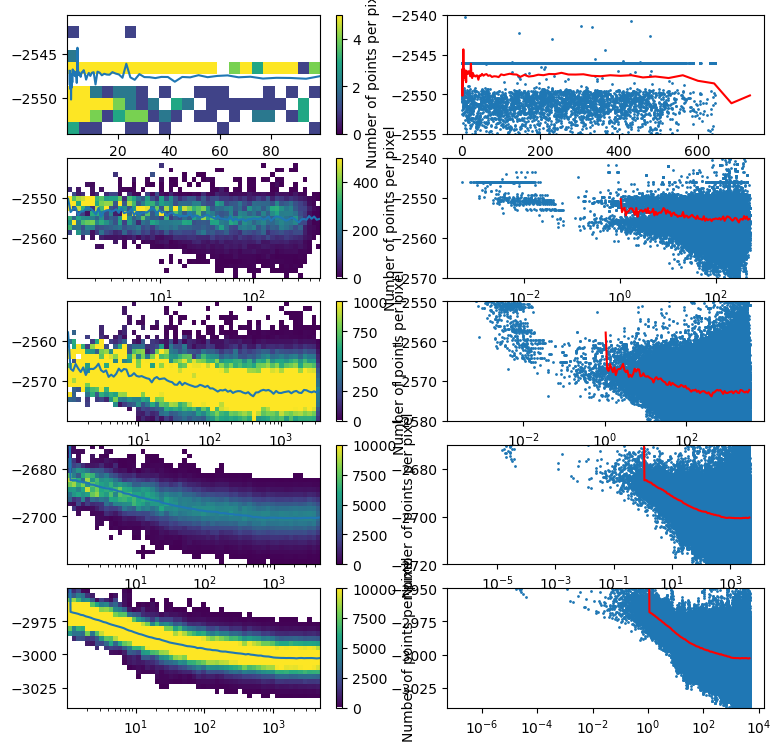

In [7]:
fig = plt.figure(figsize=(9,9))
nrows = 5
ncols = 2
ax = scatter_density(fig,NRGs[0].time[:100].astype(float).flatten(),NRGs[0].data[:100].astype(float).flatten(),nrows=nrows,ncols=ncols,pos=1,dpi=10,xlim=(0,100),ylim=(-2555,-2540),norm=True,resample=True,LogStretch=None,vmin=0,vmax=5)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data)
ax = fig.add_subplot(nrows,ncols,2,projection='scatter_density')
ax.scatter(NRGs[0].time[:10].astype(float).flatten(),NRGs[0].data[:10].astype(float).flatten(),s=1.)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data,color='red')
ax.set_ylim(-2555,-2540)
XLIM=[(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**0,10**4)]
YLIM = [(-2570,-2540),(-2580,-2550),(-2720,-2670),(-3040,-2950)]
VMAX = [500,1000,10000,10**4]
RESAMPLE = [True,True,True,True]
for n,nrg in enumerate(NRGs[1:]):
    X,Y = nrg.time[:100].astype(float).flatten(),nrg.data[:100].astype(float).flatten()
    ax = scatter_density(fig,X,Y,nrows=nrows,ncols=ncols,pos=2*n+3,dpi=25,resample=RESAMPLE[n],xlim=XLIM[n],ylim=YLIM[n],vmin=0,vmax=VMAX[n],norm=True)
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data)
    ax.set_xscale('log')
    ax = fig.add_subplot(nrows,ncols,2*n+4,projection='scatter_density')
    ax.set_xscale('log')
    ax.scatter(X,Y,s=1)
    ax.set_ylim(YLIM[n])
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data,color='red')


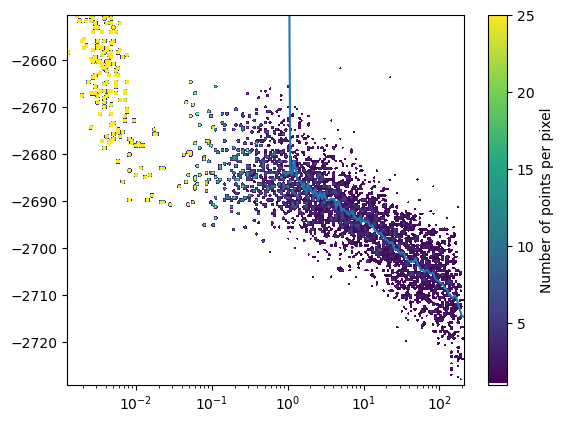

In [36]:
fig = plt.figure()
#ax = using_mpl_scatter_density(fig,NRGs[0].time[:1000].astype(float).flatten(),NRGs[0].data[:1000].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=40,ylim=(-2570,-2540),xlim=None,norm=norm,resample=True)
ax = using_mpl_scatter_density(fig,NRGs[0].time[:100].astype(float).flatten(),NRGs[0].data[:100].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=50,xlim=None,ylim=(-2730,-2650),norm=norm,resample=True)
XY = NRGs[0].binned_time,NRGs[0].average_data
plt.plot(XY[0],XY[1])
#XY = np.load('N50.npy')#NRGs[0].binned_time,NRGs[0].average_data
#plt.plot(XY[0],XY[1])

plt.xscale('log')
#ax.set_xscale('log')
#fig.savefig('scatter_density_50Nlinker_ell.svg',transparent=True)

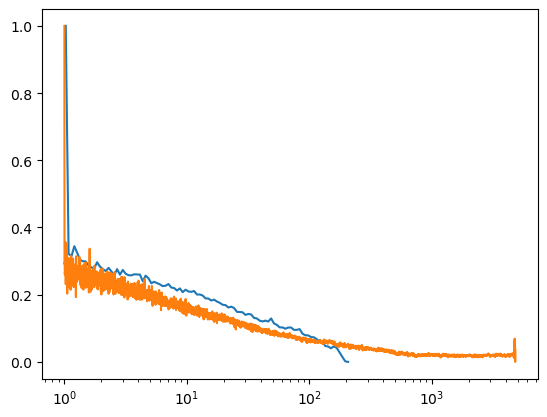

In [37]:
XY2 = np.load(NAMEs[0]+'.npy')#NRGs[0].binned_time,NRGs[0].average_data
plt.plot(XY[0],(XY[1]-np.min(XY[1]))/(np.max(XY[1])-np.min(XY[1])))
plt.plot(XY2[0],(XY2[1]-np.min(XY2[1]))/(np.max(XY2[1])-np.min(XY2[1])))
plt.xscale('log')

/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


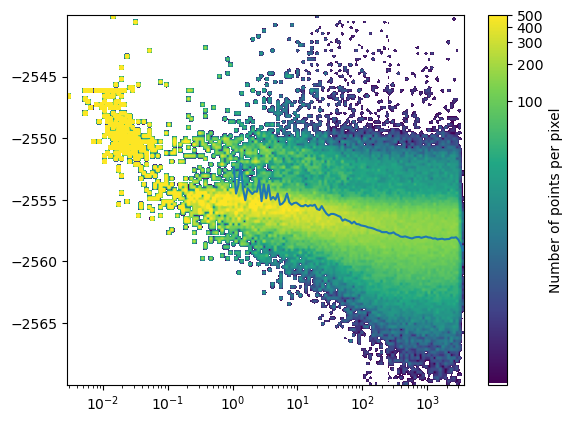

In [127]:
fig = plt.figure()
ax = using_mpl_scatter_density(fig,NRGs[0].time[:1000].astype(float).flatten(),NRGs[0].data[:1000].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=40,ylim=(-2570,-2540),xlim=None,norm=norm,resample=True)
#ax = using_mpl_scatter_density(fig,NRGs[0].time[:100].astype(float).flatten(),NRGs[0].data[:100].astype(float).flatten(),nrows=1,ncols=1,pos=1,dpi=50,xlim=(10**-2,10**4),norm=norm)
XY = np.load(NAMEs[0]+'.npy')#NRGs[0].binned_time,NRGs[0].average_data
plt.plot(XY[0],XY[1])
ax.set_xscale('log')
#fig.savefig('scatter_density_50Nlinker_ell.svg',transparent=True)

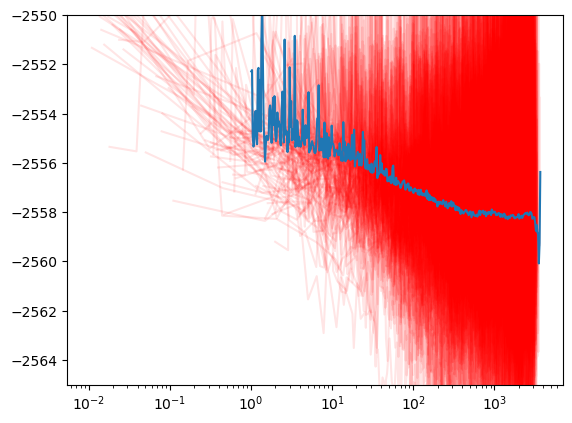

In [115]:
for nrg,time in zip(NRGs[0].data[:100],NRGs[0].time[:100]):
    #X,Y = curate_data(time,nrg,0,-1)    
    X,Y = time,nrg
    plt.plot(X,Y,color='red',alpha=0.1)
#X,Y = curate_data(NRGs[0].binned_time,NRGs[0].average_data,10,-10)
XY = np.load(NAMEs[0]+'.npy')#NRGs[0].binned_time,NRGs[0].average_data
plt.plot(XY[0],XY[1])
#for nrg,time in zip(NRGs[3].data[:100],NRGs[3].time[:100]):
#    #X,Y = curate_data(time,nrg,0,-1)
#    X,Y = time,nrg + 50*15
#    plt.plot(X,Y,color='black',alpha=0.1)
#X,Y = curate_data(NRGs[3].binned_time,NRGs[3].average_data,10,-10)
#X,Y = NRGs[3].binned_time,NRGs[3].average_data-np.mean(NRGs[3].average_data[-100:])
#plt.plot(X,Y)
#plt.ylim(-10,10)
#plt.xlim(10**-1,10**4)
plt.ylim(-2565,-2550)
plt.xscale('log')
    

AttributeError: 'Data_Treatement' object has no attribute 'binned_time'

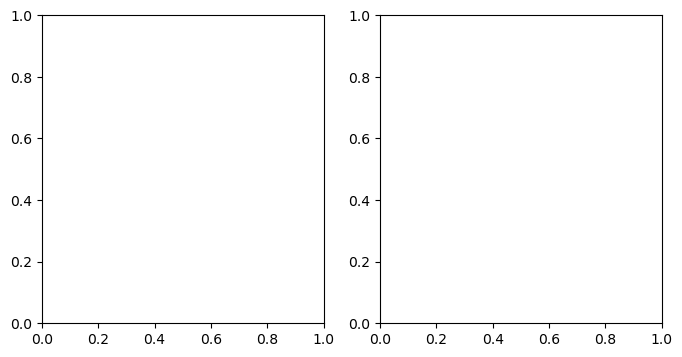

In [111]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))
for n,NRG in enumerate(NRGs):
    #ax[0].plot(NRG.binned_time,NRG.average_data/NRG.attributes['ell_tot'],label=NAMEs[n])
    X,Y = curate_data(NRG.binned_time,NRG.average_data,10,-20,window_size=20)
    #X,Y = NRG.binned_time,NRG.average_data
    if NRG.attributes['ell_tot']==10**3:
        i=0
    else:
        i=1
    ax[i].plot(X,Y,label=NAMEs[n])
ax[0].set_xscale('log')
ax[0].set_ylim(-0.1,1.1)
ax[1].set_xscale('log')
ax[1].set_ylim(-0.1,1.1)
ax[0].legend()